In [65]:
import pandas as pd 
import numpy as np 
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

%matplotlib inline

In [66]:
df = pd.read_csv('2018-07-26 20_51_48 +0000.csv')

In [67]:
df.head()

,Date,Speed,Altitude,Pressure,X,Y,Z,G,Latitude,Longitude,Heading,Magnetic Field,Sound Level,Luminance
0,2018-07-26 15:51:48.173,0.0,590.931042,948.597946,0.232834,-0.550598,-0.732666,0.945605,31.433752,-100.513297,75.70752,47.46015,48.689686,0.0
1,2018-07-26 15:51:48.273,0.0,590.931042,948.597946,0.297226,-0.557144,-0.805466,1.023488,31.433752,-100.513297,75.70752,47.46015,49.123077,0.0
2,2018-07-26 15:51:48.372,0.0,590.931042,948.597946,0.275970,-0.546875,-0.805847,1.012236,31.433752,-100.513297,75.70752,47.46015,54.876453,0.0
3,2018-07-26 15:51:48.470,0.0,590.931042,948.597946,0.252670,-0.558243,-0.819534,1.023286,31.433752,-100.513297,75.70752,47.46015,52.258381,0.0
4,2018-07-26 15:51:48.570,0.0,590.931042,948.597946,0.256989,-0.574127,-0.763184,0.988997,31.433752,-100.513297,75.70752,47.46015,50.400669,0.0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
Date              122 non-null object
Speed             122 non-null float64
Altitude          122 non-null float64
Pressure          122 non-null float64
X                 122 non-null float64
Y                 122 non-null float64
Z                 122 non-null float64
G                 122 non-null float64
Latitude          122 non-null float64
Longitude         122 non-null float64
Heading           122 non-null float64
Magnetic Field    122 non-null float64
Sound Level       122 non-null float64
Luminance         122 non-null float64
dtypes: float64(13), object(1)
memory usage: 13.4+ KB


In [69]:
df.columns

Index(['Date', 'Speed', 'Altitude', 'Pressure', 'X', 'Y', 'Z', 'G', 'Latitude',
       'Longitude', 'Heading', 'Magnetic Field', 'Sound Level', 'Luminance'],
      dtype='object')

In [70]:
cols_to_norm = ['X', 'Y', 'Z', 'G']

In [71]:
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [72]:
df.head()

,Date,Speed,Altitude,Pressure,X,Y,Z,G,Latitude,Longitude,Heading,Magnetic Field,Sound Level,Luminance
0,2018-07-26 15:51:48.173,0.0,590.931042,948.597946,0.801359,0.296589,0.406283,0.441647,31.433752,-100.513297,75.70752,47.46015,48.689686,0.0
1,2018-07-26 15:51:48.273,0.0,590.931042,948.597946,0.900915,0.288818,0.365049,0.502570,31.433752,-100.513297,75.70752,47.46015,49.123077,0.0
2,2018-07-26 15:51:48.372,0.0,590.931042,948.597946,0.868051,0.301009,0.364833,0.493768,31.433752,-100.513297,75.70752,47.46015,54.876453,0.0
3,2018-07-26 15:51:48.470,0.0,590.931042,948.597946,0.832027,0.287513,0.357080,0.502412,31.433752,-100.513297,75.70752,47.46015,52.258381,0.0
4,2018-07-26 15:51:48.570,0.0,590.931042,948.597946,0.838705,0.268655,0.388997,0.475590,31.433752,-100.513297,75.70752,47.46015,50.400669,0.0


In [73]:
x_cont_feat_col = tf.feature_column.numeric_column('X')
y_cont_feat_col = tf.feature_column.numeric_column('Y')
# z_cont_feat_col = tf.feature_column.numeric_column('Z')
g_cont_feat_col = tf.feature_column.numeric_column('G')

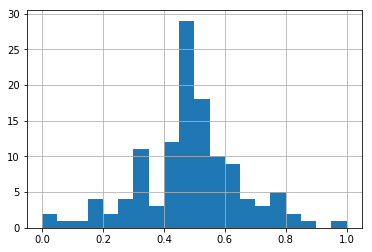

In [74]:
df['G'].hist(bins=20)

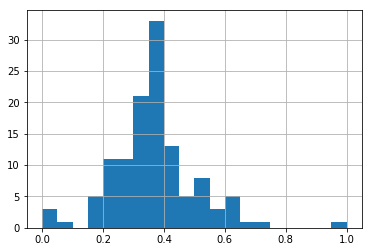

In [75]:
df['Z'].hist(bins=20)

In [76]:
date_bucket = tf.feature_column.categorical_column_with_hash_bucket('Date', hash_bucket_size=10)

In [77]:
date_bucket

_HashedCategoricalColumn(key='Date', hash_bucket_size=10, dtype=tf.string)

In [78]:
feat_cols = [x_cont_feat_col, y_cont_feat_col, g_cont_feat_col, date_bucket]

In [79]:
df.head()

,Date,Speed,Altitude,Pressure,X,Y,Z,G,Latitude,Longitude,Heading,Magnetic Field,Sound Level,Luminance
0,2018-07-26 15:51:48.173,0.0,590.931042,948.597946,0.801359,0.296589,0.406283,0.441647,31.433752,-100.513297,75.70752,47.46015,48.689686,0.0
1,2018-07-26 15:51:48.273,0.0,590.931042,948.597946,0.900915,0.288818,0.365049,0.502570,31.433752,-100.513297,75.70752,47.46015,49.123077,0.0
2,2018-07-26 15:51:48.372,0.0,590.931042,948.597946,0.868051,0.301009,0.364833,0.493768,31.433752,-100.513297,75.70752,47.46015,54.876453,0.0
3,2018-07-26 15:51:48.470,0.0,590.931042,948.597946,0.832027,0.287513,0.357080,0.502412,31.433752,-100.513297,75.70752,47.46015,52.258381,0.0
4,2018-07-26 15:51:48.570,0.0,590.931042,948.597946,0.838705,0.268655,0.388997,0.475590,31.433752,-100.513297,75.70752,47.46015,50.400669,0.0


In [51]:
df.info

<bound method DataFrame.info of                         Date  Speed    Altitude    Pressure         X  \
0    2018-07-26 15:51:48.173    0.0  590.931042  948.597946  0.801359   
1    2018-07-26 15:51:48.273    0.0  590.931042  948.597946  0.900915   
2    2018-07-26 15:51:48.372    0.0  590.931042  948.597946  0.868051   
3    2018-07-26 15:51:48.470    0.0  590.931042  948.597946  0.832027   
4    2018-07-26 15:51:48.570    0.0  590.931042  948.597946  0.838705   
5    2018-07-26 15:51:48.673    0.0  590.931042  948.597946  0.826036   
6    2018-07-26 15:51:48.771    0.0  590.931042  948.597946  0.819029   
7    2018-07-26 15:51:48.872    0.0  590.931042  948.597946  0.809900   
8    2018-07-26 15:51:48.970    0.0  590.931042  948.600311  0.819383   
9    2018-07-26 15:51:49.071    0.0  590.931042  948.600311  0.815631   
10   2018-07-26 15:51:49.172    0.0  591.028454  948.600311  0.810300   
11   2018-07-26 15:51:49.272    0.0  591.028454  948.600311  0.836440   
12   2018-07-26 15:

In [80]:
x_data = df.drop('Z',axis=1)

In [81]:
labels = df['Z']

In [82]:
list(labels)

[0.40628302855026116,
 0.36504867126814905,
 0.36483287057962593,
 0.35708047156698491,
 0.38899745004015823,
 0.3751522216142798,
 0.35492812874181967,
 0.38961993024143626,
 0.374970405286154,
 0.36287084017268589,
 0.38203178897071571,
 0.35561121438580628,
 0.38072678953145767,
 0.3739423783841343,
 0.36795263486410223,
 0.38515155325519201,
 0.32051329977944149,
 0.56088298165184391,
 0.52829141362478327,
 0.44686885095479062,
 0.30002979295594834,
 0.042988516684621794,
 0.49289103821088204,
 0.63965249858681694,
 0.38700993136292011,
 0.22389689598180262,
 0.21514195833743974,
 0.52526680554941951,
 0.64992880276496756,
 0.30365988905239144,
 0.30059166771451779,
 0.38271430820869573,
 0.36134097754879874,
 0.30488729086874222,
 0.18265404260959103,
 0.41004283162222083,
 0.33933667059752431,
 0.33811833127727947,
 0.28965889897469183,
 0.28965889897469183,
 0.40789048879705564,
 0.54945743968625638,
 0.32546538749534132,
 0.40451131056154627,
 0.37934362606328575,
 0.3749449170

In [83]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.50, random_state=101)

In [84]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=False)

In [85]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_tf_random_seed': 1, '_save_summary_steps': 100, '_keep_checkpoint_max': 5, '_model_dir': '/tmp/tmpaulmfpae', '_save_checkpoints_secs': 600, '_session_config': None, '_log_step_count_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_steps': None}


In [86]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpaulmfpae/model.ckpt.
INFO:tensorflow:loss = 6.93147, step = 1
INFO:tensorflow:global_step/sec: 454.653
INFO:tensorflow:loss = 6.53438, step = 101 (0.228 sec)
INFO:tensorflow:global_step/sec: 456.733
INFO:tensorflow:loss = 6.5007, step = 201 (0.219 sec)
INFO:tensorflow:global_step/sec: 444.45
INFO:tensorflow:loss = 5.90824, step = 301 (0.224 sec)
INFO:tensorflow:global_step/sec: 458.689
INFO:tensorflow:loss = 6.34869, step = 401 (0.218 sec)
INFO:tensorflow:global_step/sec: 444.717
INFO:tensorflow:loss = 6.4507, step = 501 (0.225 sec)
INFO:tensorflow:global_step/sec: 403.562
INFO:tensorflow:loss = 6.59288, step = 601 (0.249 sec)
INFO:tensorflow:global_step/sec: 388.426
INFO:tensorflow:loss = 6.25584, step = 701 (0.257 sec)
INFO:tensorflow:global_step/sec: 428.547
INFO:tensorflow:loss = 5.59197, step = 801 (0.234 sec)
INFO:tensorflow:global_step/sec: 318.079
INFO:tensorflow:loss = 6.21242, st

In [87]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [88]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-07-27-17:13:18
INFO:tensorflow:Restoring parameters from /tmp/tmpaulmfpae/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-07-27-17:13:18
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.0163934, accuracy_baseline = 0.633705, auc = 0.999999, auc_precision_recall = 1.0, average_loss = 0.617902, global_step = 1000, label/mean = 0.366295, loss = 5.38458, prediction/mean = 0.37438


In [89]:
results

{'accuracy': 0.016393442,
 'accuracy_baseline': 0.6337049,
 'auc': 0.99999905,
 'auc_precision_recall': 1.0,
 'average_loss': 0.61790228,
 'global_step': 1000,
 'label/mean': 0.36629513,
 'loss': 5.3845773,
 'prediction/mean': 0.37438005}

In [90]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [94]:
predictions = model.predict(pred_input_func)

In [95]:
list(predictions)

INFO:tensorflow:Restoring parameters from /tmp/tmpaulmfpae/model.ckpt-1000


[{'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.34779724], dtype=float32),
  'logits': array([-0.62873572], dtype=float32),
  'probabilities': array([ 0.65220273,  0.34779727], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.3064487], dtype=float32),
  'logits': array([-0.81677479], dtype=float32),
  'probabilities': array([ 0.69355124,  0.3064487 ], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.62865615], dtype=float32),
  'logits': array([ 0.52645594], dtype=float32),
  'probabilities': array([ 0.37134388,  0.62865615], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.15192907], dtype=float32),
  'logits': array([-1.71955061], dtype=float32),
  'probabilities': array([ 0.84807092,  0.15192907], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array